# 1) AstroPy

In [1]:
from astropy.io import fits

In [2]:
!ls 

1-ScientificPython.ipynb              chivo_search.ipynb
2-AstroPython.ipynb                   emhbeta_flux.fits
3-ipyaladin.ipynb                     emnii6584_flux.fits
ALMA-OrionKL-band6-cont.fits          emsii6731_flux.fits
ALMA-OrionKL-band6-methanol.fits      prep
ALMA-OrionKL-band6-methanon-mom0.fits view.fits
Test.ipynb


In [3]:
hdulist = fits.open("ALMA-OrionKL-band6-cont.fits")
hdulist

In [4]:
hdu = hdulist[0]
help(hdu)

Help on PrimaryHDU in module astropy.io.fits.hdu.image object:

class PrimaryHDU(_ImageBaseHDU)
 |  FITS primary HDU class.
 |  
 |  Method resolution order:
 |      PrimaryHDU
 |      _ImageBaseHDU
 |      astropy.io.fits.hdu.base._ValidHDU
 |      astropy.io.fits.hdu.base._BaseHDU
 |      astropy.io.fits.verify._Verify
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, header=None, do_not_scale_image_data=False, ignore_blank=False, uint=True, scale_back=None)
 |      Construct a primary HDU.
 |      
 |      Parameters
 |      ----------
 |      data : array or DELAYED, optional
 |          The data in the HDU.
 |      
 |      header : Header instance, optional
 |          The header to be used (as a template).  If ``header`` is `None`, a
 |          minimal header will be provided.
 |      
 |      do_not_scale_image_data : bool, optional
 |          If `True`, image data is not scaled using BSCALE/BZERO values
 |          when read. (default:

In [5]:
hdu.data

array([[ 0.03462455,  0.03394877,  0.0348247 , ...,  0.00512782,
         0.01290684,  0.02093568],
       [ 0.04125445,  0.03483354,  0.03083117, ...,  0.00361592,
         0.01317338,  0.02610629],
       [ 0.04762579,  0.0362675 ,  0.02696897, ..., -0.00290151,
         0.01028361,  0.02754407],
       ..., 
       [-0.00706197, -0.00413066, -0.00275087, ..., -0.02907074,
        -0.00520752,  0.01757605],
       [-0.00493182, -0.00635676, -0.00597036, ..., -0.02548184,
        -0.00696347,  0.01069312],
       [ 0.00124471, -0.00786869, -0.01027288, ..., -0.01701476,
        -0.00597558,  0.00344427]], dtype=float32)

In [6]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 51.0 / Pixel coordinate of reference point            
CRPIX2  =                 51.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0001111111111111 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0001111111111111 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---SIN'        

In [7]:
from astropy.wcs import WCS
wcs = WCS(hdu.header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 83.809791666669994  -5.3763888888890001  
CRPIX : 51.0  51.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  
NAXIS : 100  100

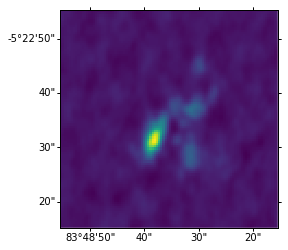

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplot(projection=wcs)
plt.imshow(hdu.data)

In [9]:
help(wcs)

Help on WCS in module astropy.wcs.wcs object:

class WCS(astropy.wcs.WCSBase)
 |  WCS objects perform standard WCS transformations, and correct for
 |  `SIP`_ and `distortion paper`_ table-lookup transformations, based
 |  on the WCS keywords and supplementary data read from a FITS file.
 |  
 |  Parameters
 |  ----------
 |  header : astropy.io.fits header object, Primary HDU, Image HDU, string, dict-like, or None, optional
 |      If *header* is not provided or None, the object will be
 |      initialized to default values.
 |  
 |  fobj : An astropy.io.fits file (hdulist) object, optional
 |      It is needed when header keywords point to a `distortion
 |      paper`_ lookup table stored in a different extension.
 |  
 |  key : str, optional
 |      The name of a particular WCS transform to use.  This may be
 |      either ``' '`` or ``'A'``-``'Z'`` and corresponds to the
 |      ``"a"`` part of the ``CTYPEia`` cards.  *key* may only be
 |      provided if *header* is also provided.

In [10]:
resol  = wcs.wcs.cdelt
center = wcs.wcs.crval
lpoints = [center, center + 2*resol, center -5*resol]
lpoints

[array([ 83.80979167,  -5.37638889]),
 array([ 83.80956944,  -5.37616667]),
 array([ 83.81034722,  -5.37694444])]

In [11]:
import astropy.units as u
import numpy as np
diff = lpoints[0] - lpoints[2]
dist = np.sqrt(diff[0]**2 + diff[1]**2)* u.deg
dist.to("arcsec")

<Quantity 2.828427124733067 arcsec>

In [12]:
lpix = wcs.all_world2pix(lpoints,0)
lpix

array([[ 50.        ,  50.        ],
       [ 51.99120205,  51.99999964],
       [ 45.02200124,  44.99999774]])

In [13]:
lpix_int=lpix.astype("int")
print(lpix_int)
for pix in lpix_int:
    print(hdu.data[pix[0],pix[1]])

[[50 50]
 [51 51]
 [45 44]]
0.110144
0.00510559
0.000227621


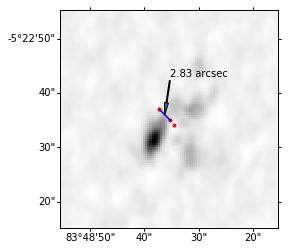

In [14]:
plt.subplot(projection=wcs)
plt.imshow(hdu.data,cmap="gray_r")
plt.scatter(lpix[:,0],lpix[:,1],c='red',marker='.')
ini = lpix[0]
end = lpix[2]
plt.plot([ini[0],end[0]],[ini[1],end[1]],c="blue")
dist = np.around(dist.to("arcsec"),decimals=2)
plt.annotate(dist, xy=(ini+end)/2, xytext=(50, 30),
           arrowprops=dict(headwidth=4,width=1))
plt.show()

In [15]:
!ls

1-ScientificPython.ipynb              chivo_search.ipynb
2-AstroPython.ipynb                   emhbeta_flux.fits
3-ipyaladin.ipynb                     emnii6584_flux.fits
ALMA-OrionKL-band6-cont.fits          emsii6731_flux.fits
ALMA-OrionKL-band6-methanol.fits      prep
ALMA-OrionKL-band6-methanon-mom0.fits view.fits
Test.ipynb


In [16]:
# http://muse-vlt.eu/science/m42/

In [17]:
H = fits.open("emhbeta_flux.fits")[0]
N = fits.open("emnii6584_flux.fits")[0]
S = fits.open("emsii6731_flux.fits")[0]
wcs = WCS(H.header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 1766  1476

In [18]:
def stand(A):
    A=np.power(A,1/3)
    A=A-A.min()
    A=A/A.max()
    return(A)

nH =stand(H.data)
nN =stand(N.data)
nS =stand(S.data)

(-0.5, 1765.5, 1475.5, -0.5)

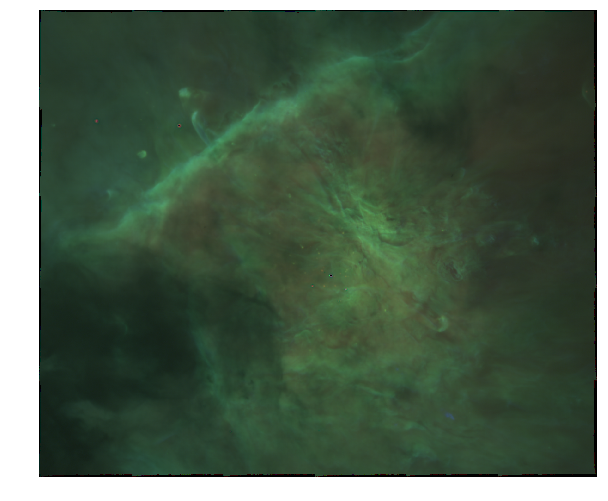

In [19]:
plt.figure(figsize=(10,10))
rgbimg = np.array([nH.T,nN.T,nS.T]).T
plt.imshow(rgbimg)
plt.axis('off')

In [20]:
Orion3D = fits.open("ALMA-OrionKL-band6-methanol.fits")[0]

In [21]:
import warnings
warnings.simplefilter('ignore', Warning)

In [22]:
wcs = WCS(Orion3D.header)
wcs

WCS Keywords

Number of WCS axes: 4
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  'STOKES'  
CRVAL : 83.809791666669994  -5.3763888888890001  229763161321.39999  1.0  
CRPIX : 51.0  51.0  1.0  1.0  
PC1_1 PC1_2 PC1_3 PC1_4  : 1.0  0.0  0.0  0.0  
PC2_1 PC2_2 PC2_3 PC2_4  : 0.0  1.0  0.0  0.0  
PC3_1 PC3_2 PC3_3 PC3_4  : 0.0  0.0  1.0  0.0  
PC4_1 PC4_2 PC4_3 PC4_4  : 0.0  0.0  0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  -488336.1207886  1.0  
NAXIS : 100  100  41  1

In [23]:
my_data = Orion3D.data[0]
my_data.shape

(41, 100, 100)

In [24]:
my_wcs = wcs.dropaxis(3)
my_wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.809791666669994  -5.3763888888890001  229763161321.39999  
CRPIX : 51.0  51.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  -488336.1207886  
NAXIS : 100  100  41  1

In [25]:
vmax = my_data.max()
vmin = my_data.min()

def func(i):
    plt.subplot(projection=my_wcs.dropaxis(2))
    plt.imshow(my_data[i],cmap="seismic",vmax=vmax,vmin=vmin)
    plt.colorbar()

In [26]:
from ipywidgets import interact
interact(func,i=(0,40,1))

A Jupyter Widget

<function __main__.func>

# 2) AplPy
``conda install -c astropy aplpy``

INFO: Auto-setting vmin to -1.115e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.030e+01 [aplpy.core]


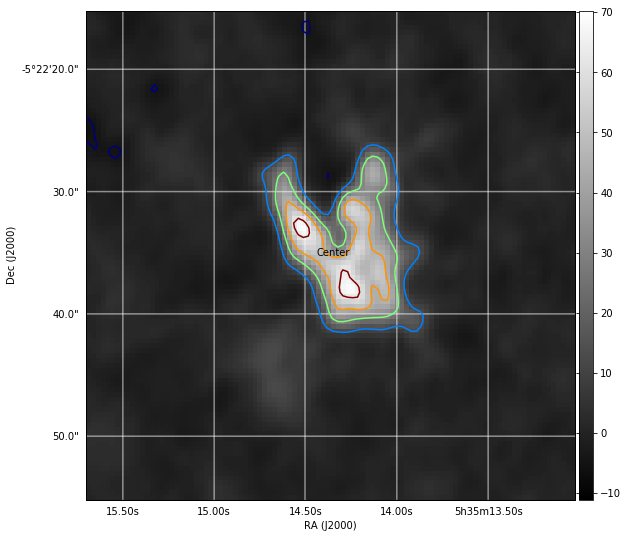

In [27]:
import aplpy
imgi = fits.open("ALMA-OrionKL-band6-methanon-mom0.fits")[0]
fig = aplpy.FITSFigure(imgi)
fig.show_grayscale()
fig.show_grid()
fig.show_contour()
fig.add_colorbar()
fig.add_label(imgi.header['CRVAL1'],imgi.header['CRVAL2'],"Center")

# 3) Astroquery

``conda install -c astropy astroquery``

In [28]:
import astroquery

In [29]:
from astroquery.skyview import SkyView
dd=SkyView.list_surveys()

{'All:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                       'GOODS: Chandra ACIS FB',
                       'GOODS: Chandra ACIS SB',
                       'GOODS: VLT VIMOS U',
                       'GOODS: VLT VIMOS R',
                       'GOODS: HST ACS B',
                       'GOODS: HST ACS V',
                       'GOODS: HST ACS I',
                       'GOODS: HST ACS Z',
                       'Hawaii HDF U',
                       'Hawaii HDF B',
                       'Hawaii HDF V0201',
                       'Hawaii HDF V0401',
                       'Hawaii HDF R',
                       'Hawaii HDF I',
                       'Hawaii HDF z',
                       'Hawaii HDF HK',
                       'GOODS: HST NICMOS',
                       'GOODS: VLT ISAAC J',
                       'GOODS: VLT ISAAC H',
                       'GOODS: VLT ISAAC Ks',
                       'HUDF: VLT ISAAC Ks',
                       'GOODS: Spitzer IRAC 3

In [32]:
res=SkyView.get_image_list('Orion',['SDSSg'])
print(res)

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv20488732635370.fits']


In [33]:
import urllib.request
urllib.request.urlretrieve(res[0],'view.fits')

('view.fits', <http.client.HTTPMessage at 0x1260d9470>)

In [34]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100                                                  
NAXIS2  =                  100                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                 51.0 / Pixel coordinate of reference point            
CRPIX2  =                 51.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0001111111111111 / [deg] Coordinate increment at reference point  
CDELT2  =   0.0001111111111111 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---SIN'        

In [35]:
side = 0.0001111111111111*51

INFO: Auto-setting vmin to  2.244e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.239e+02 [aplpy.core]


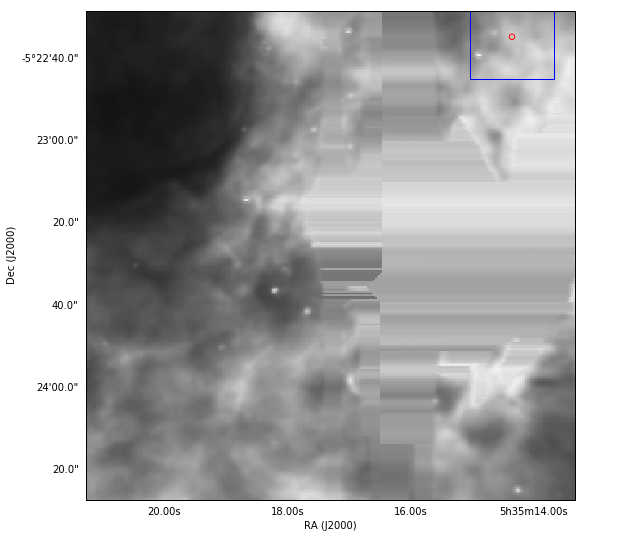

In [36]:
hdulist = fits.open("view.fits")
view = hdulist[0] 
fig = aplpy.FITSFigure(view)
fig.show_grayscale()
fig.show_markers(center[0],center[1])
fig.show_rectangles(center[0],center[1],width=side,height=side,edgecolor="blue")

In [37]:
#from astroquery.vizier import Vizier
from astroquery.simbad import Simbad

In [38]:
from astropy.coordinates import SkyCoord
c = SkyCoord(ra=center[0]*u.deg, dec=center[1]*u.deg)
tab = Simbad.query_region(c, radius=side/2.0*u.deg)
tab.show_in_notebook()

idx,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,RA_2,COO_ERR_ANGLE,DEC_2,RA_PREC_2,DEC_PREC_2,COO_ERR_MAJA_2,COO_ERR_MINA_2,COO_ERR_ANGLE_2,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,,"""h:m:s""","""d:m:s""",,,mas,mas,"""h:m:s""",deg,"""d:m:s""",,,mas,mas,deg,,,
0,[BE83] IR 208.99-19.39B,05 35 14.3,-05 22 35,5,5,--,--,05 35 14.3,0,-05 22 35,5,5,--,--,0,D,,
1,CXOONC J053514.3-052235,05 35 14.368,-05 22 35.97,7,7,--,--,05 35 14.368,0,-05 22 35.97,7,7,--,--,0,D,,2005ApJS..160..319G
2,[FDB2011] MF2,05 35 14.44,-05 22 34.4,6,6,--,--,05 35 14.44,0,-05 22 34.4,6,6,--,--,0,D,m,2011A&A...532A..32F
3,MLLA 585,05 35 14.250,-05 22 35.21,7,7,--,--,05 35 14.250,0,-05 22 35.21,7,7,--,--,0,D,,1999AJ....117.1375S
4,[CW97] 3,05 35 14.46,-05 22 35.0,6,6,--,--,05 35 14.46,0,-05 22 35.0,6,6,--,--,0,D,,
5,[JGS92] 2,05 35 14.416,-05 22 36.39,7,7,--,--,05 35 14.416,0,-05 22 36.39,7,7,--,--,0,D,,
6,[FW2011] C34,05 35 14.4640,-05 22 35.350,8,8,--,--,05 35 14.4640,0,-05 22 35.350,8,8,--,--,0,D,,2011ApJ...742...64F
7,[FW2011] J053514.431-052233.457,05 35 14.431,-05 22 33.46,7,7,--,--,05 35 14.431,0,-05 22 33.46,7,7,--,--,0,C,m,2011ApJ...742...64F
8,[VB99] OMC 1 N0,05 35 14.4,-05 22 33,5,5,--,--,05 35 14.4,0,-05 22 33,5,5,--,--,0,D,,1999ApJ...526..819V


INFO: Auto-setting vmin to  2.244e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.239e+02 [aplpy.core]


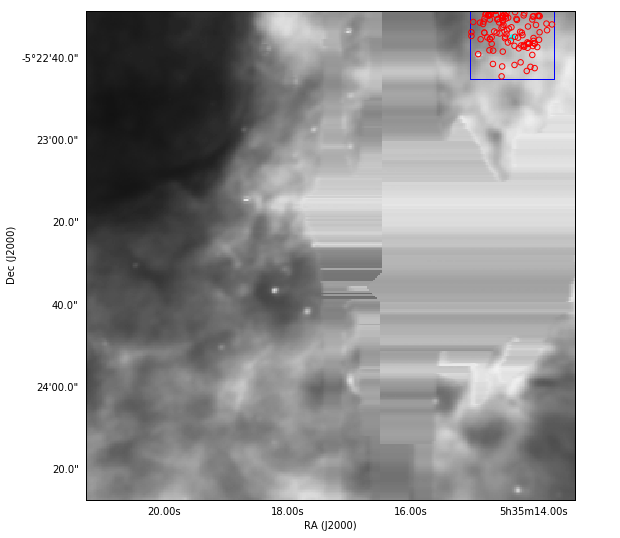

In [39]:
%matplotlib inline
from astropy.coordinates import Angle
fig = aplpy.FITSFigure(view)
fig.show_grayscale()
fig.show_markers(center[0],center[1],c="cyan")
fig.show_rectangles(center[0],center[1],width=side,height=side,edgecolor="blue")
ra_list=[]
dec_list=[]
for row in tab:
    p = SkyCoord(row['RA'],row['DEC'], unit=(u.hourangle, u.deg))
    ra_list.append(p.ra.value)
    dec_list.append(p.dec.value)
fig.show_markers(ra_list,dec_list)

In [40]:
# Visit affliation page